# back4app Database of U.S. vehicle makes and models (2000-2022)
The following analyzes our query of the [back4app.com](https://www.back4app.com/database/back4app/car-make-model-dataset) database, an open-source dataset providing detailed information about motor vehicles manufactured in the US between the years 1992 and 2022.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import seaborn as sns

matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.max_columns', 100)

In [2]:
universe = pd.read_csv('make_model_database_mod.csv')

# Vehicle Makes/Manufacturers
The [back4app.com](https://www.back4app.com/database/back4app/car-make-model-dataset) database contains 59 distinct passenger vehicle makes; however, we remove 4 small manufacturers (Fisker, Polestar, Panoz, Rivian), leaving us with 55 vehicle manufacturers of interest for this project.

In [3]:
universe.Make.unique()

array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW', 'Bentley',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge',
       'Ferrari', 'Fiat', 'Ford', 'GMC', 'Genesis', 'HUMMER', 'Honda',
       'Hyundai', 'INFINITI', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'MINI',
       'Maserati', 'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz',
       'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth',
       'Pontiac', 'Porsche', 'RAM', 'Rolls-Royce', 'Saab', 'Saturn',
       'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
       'Volvo', 'smart'], dtype=object)

# Number of Models per Manufacturer over the Period

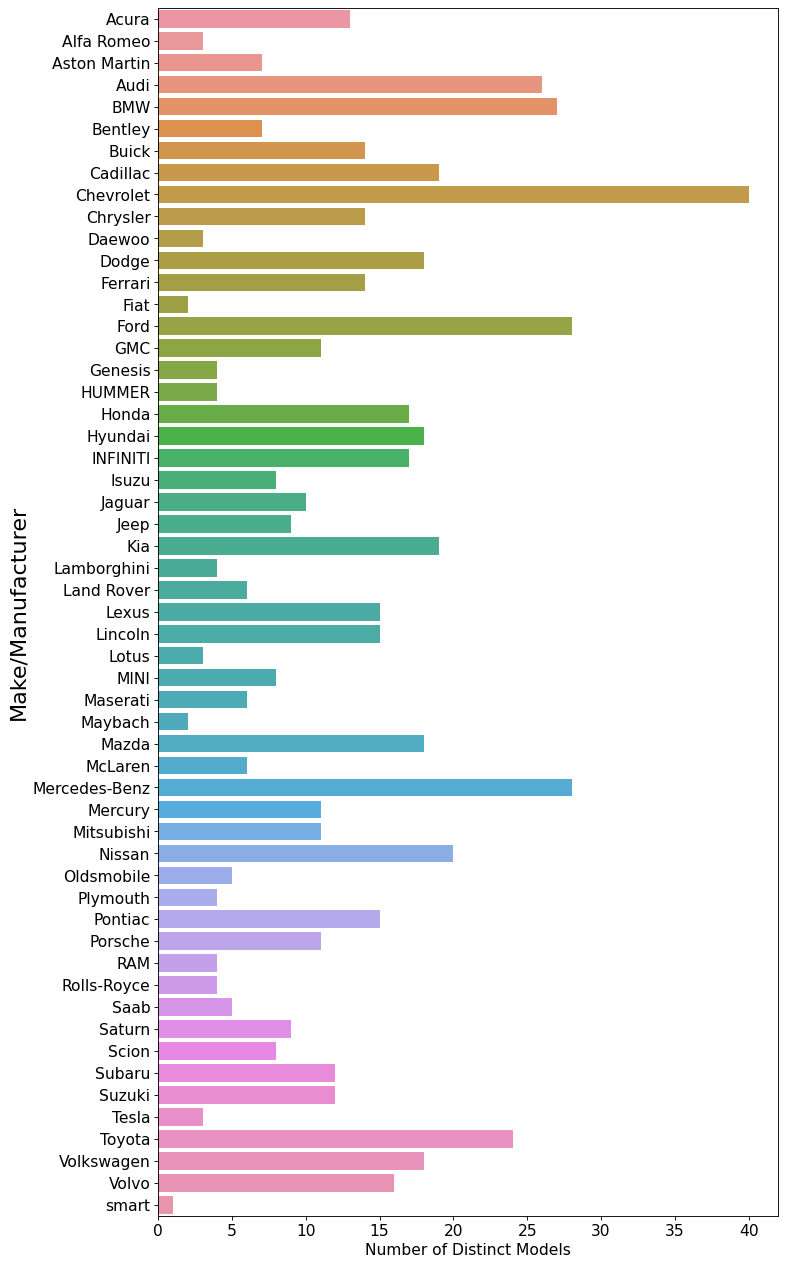

In [4]:
models = universe.groupby("Make")['Model'].nunique().reset_index().rename(columns={'Model': 'Count'})
figure(figsize=(10, 20), dpi=80)
sns.barplot(data=models, x='Count', y='Make')
plt.xlabel("Number of Distinct Models")
plt.ylabel("Make/Manufacturer", fontsize=20)
plt.show()

# Number of Models by Manufacturer and Year

In [5]:
foo = universe[['Make', 'Model', 'Year']].drop_duplicates().groupby(['Make', 'Year'])['Model'].count().reset_index()
foo['total_yrs'] = foo.groupby('Make')['Year'].transform('count')

### Manufacturers with 2022 Models in Data
2022 model information is missing for most manufacturers. For those with this information present, only a few models are contained in our data. For that reason we'll drop 2022 from this part of the analysis.

In [6]:
foo.loc[foo.Year==2022]['Make'].drop_duplicates().tolist()

['Acura',
 'Chevrolet',
 'GMC',
 'Honda',
 'Hyundai',
 'Jeep',
 'Kia',
 'Mercedes-Benz',
 'Mitsubishi',
 'Nissan',
 'Subaru',
 'Volkswagen']

In [7]:
foo = foo.loc[foo.Year < 2022].reset_index(drop=True)

In [8]:
# This will help us present data in descending order of number of models
foo['avg_model_count'] = foo.groupby(['Make'])['Model'].transform('mean')

### Manufacturers Present in all Years (2000-2021/22)

In [9]:
present_all_yrs = foo.loc[foo.total_yrs>=22]['Make'].drop_duplicates().tolist()
print(present_all_yrs)

['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hyundai', 'INFINITI', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'Subaru', 'Toyota', 'Volkswagen', 'Volvo']


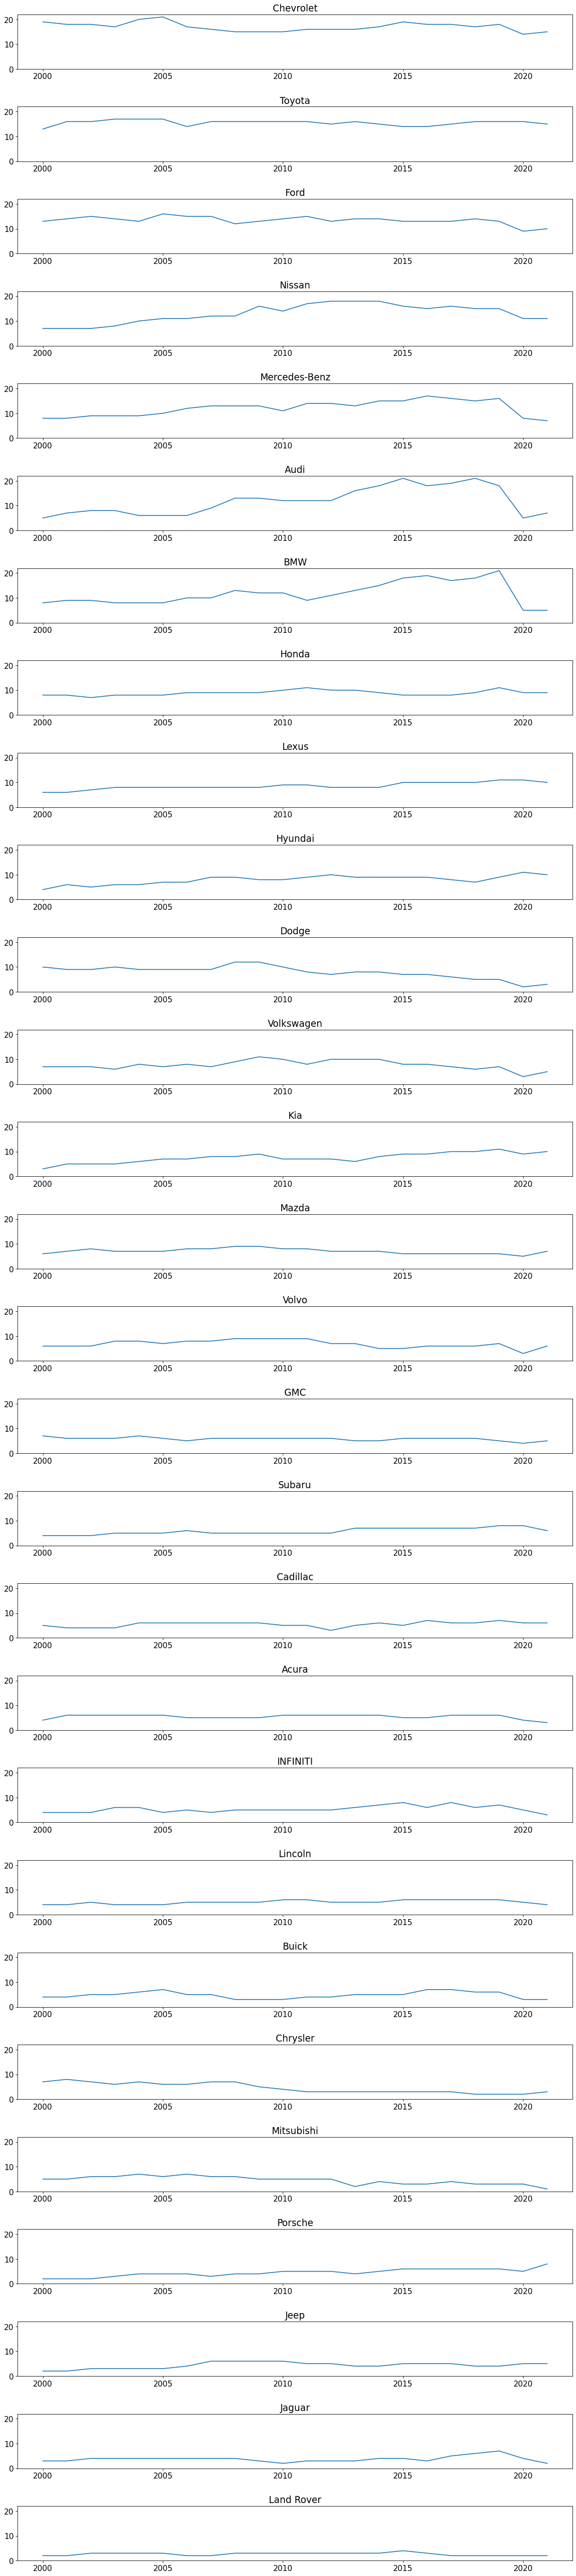

In [10]:
all_yrs = foo.loc[foo.Make.isin(present_all_yrs)]
all_yrs = all_yrs.sort_values(by=['avg_model_count', 'Year'], ascending=[False, True]).reset_index(drop=True)

fig, ax = plt.subplots(len(present_all_yrs), 1, figsize=(15, 65), dpi=80, sharex=False)
lst = all_yrs.Make.unique()
for i, make in enumerate(lst):
    temp = all_yrs[all_yrs.Make==make][['Year', 'Model']].set_index('Year')
    ax[i].plot(temp, label=make)
    ax[i].set_title(make)
    ax[i].set_ylim(0, 22)
fig.tight_layout(pad=2.0)

### Manufacturers Not Present in all Years

In [11]:
not_always_present = foo.loc[foo.total_yrs<22]['Make'].drop_duplicates().tolist()
print(not_always_present)

['Alfa Romeo', 'Aston Martin', 'Bentley', 'Daewoo', 'Ferrari', 'Fiat', 'Genesis', 'HUMMER', 'Isuzu', 'Lamborghini', 'Lotus', 'MINI', 'Maserati', 'Maybach', 'McLaren', 'Mercury', 'Oldsmobile', 'Plymouth', 'Pontiac', 'RAM', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Suzuki', 'Tesla', 'smart']


In [12]:
import matplotlib.ticker as mticker

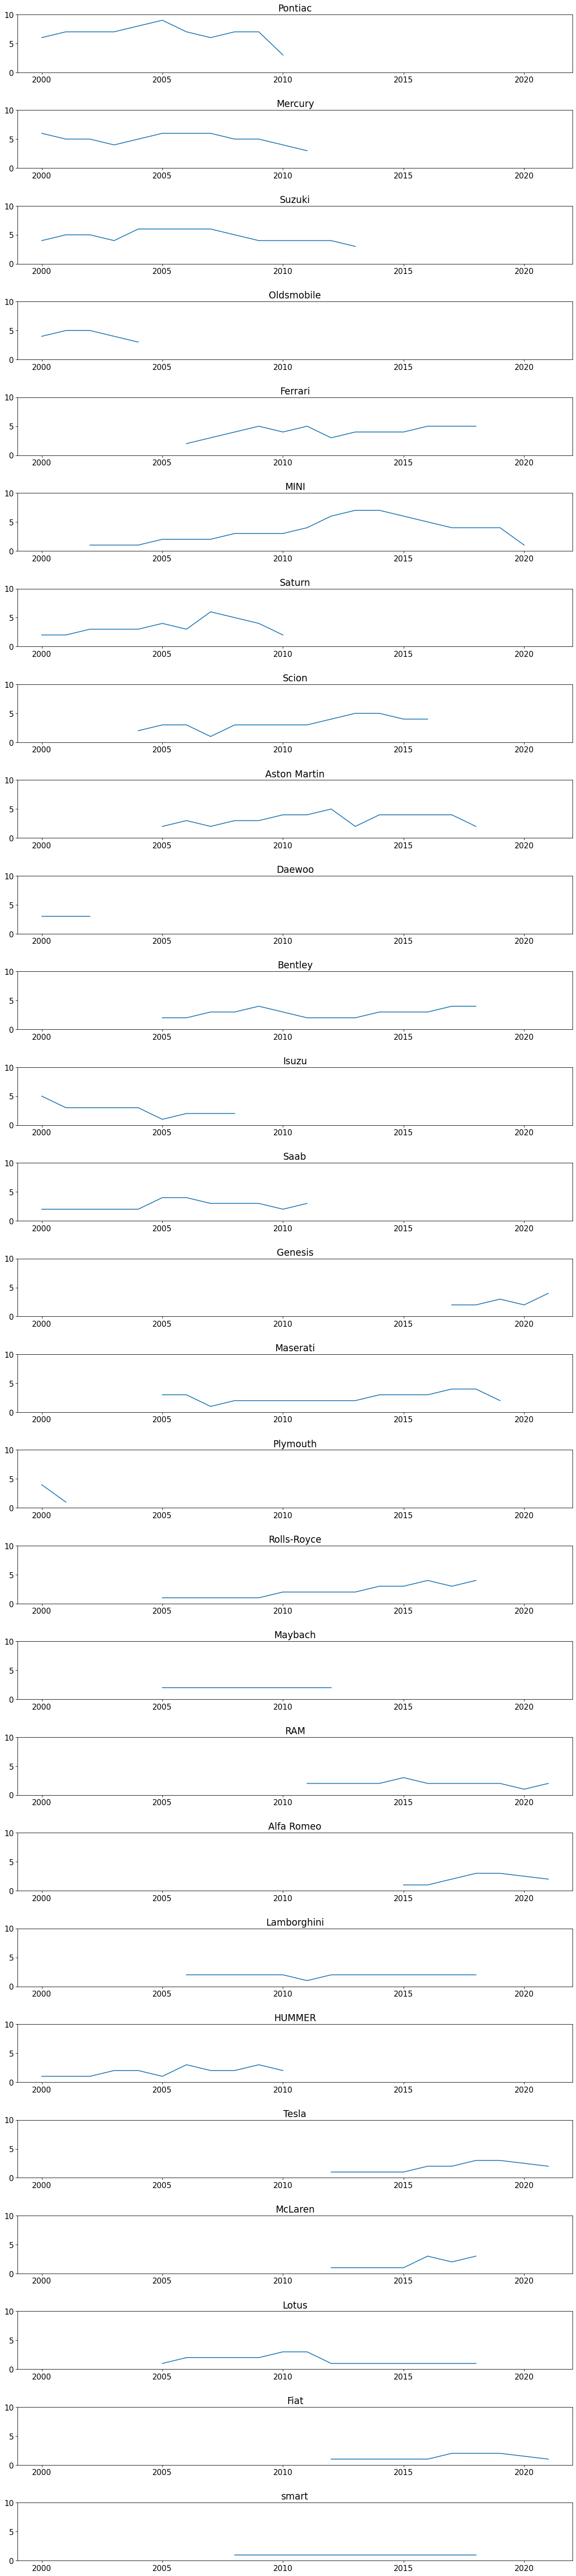

In [13]:
not_all_yrs = foo.loc[foo.Make.isin(not_always_present)]
not_all_yrs = not_all_yrs.sort_values(by=['avg_model_count', 'Year'], ascending=[False, True]).reset_index(drop=True)


fig, ax = plt.subplots(len(not_always_present), 1, figsize=(15, 65), dpi=80, sharex=False)
lst = not_all_yrs.Make.unique()
for i, make in enumerate(lst):
    temp = not_all_yrs[not_all_yrs.Make==make][['Year', 'Model']].set_index('Year')
    ax[i].plot(temp, label=make)
    ax[i].set_title(make)
    ax[i].set_ylim(0, 10)
    ax[i].set_xlim(1999, 2022)
    ax[i].set_xticks([int(i) for i in range(2000, 2023, 5)])
fig.tight_layout(pad=2.0)